In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset=pd.read_csv(r"C:\Users\Sushant\Desktop\Ankita\Datasets\Social_Network_Ads.csv")
dataset

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

# Imbalancing

In [6]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
x_data,y_data=ro.fit_resample(x,y)

In [7]:
from collections import Counter
print("Actual data",Counter(y))
print("Artificial",Counter(y_data))

Actual data Counter({0: 257, 1: 143})
Artificial Counter({0: 257, 1: 257})


# Cross-Validation

In [8]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=2,random_state=0,shuffle=True)
kf.get_n_splits(x_data)
print(kf)

KFold(n_splits=2, random_state=0, shuffle=True)


In [9]:
for train_index,test_index in kf.split(x_data):
    print("TRAIN:",train_index,"TEST:",test_index)
    x_train,x_test=x_data[train_index],x_data[test_index]
    y_train,y_test=y_data[train_index],y_data[test_index]

TRAIN: [  0   3   9  11  13  16  19  23  24  25  27  28  29  31  32  33  35  36
  38  39  40  41  42  43  44  47  48  50  53  57  58  61  62  67  69  70
  72  73  77  79  80  82  83  84  86  87  88  91  94  95  98  99 104 105
 109 110 111 115 117 119 121 123 125 127 128 129 130 131 133 138 139 143
 147 148 149 151 152 156 161 163 165 166 169 174 177 178 180 182 183 184
 185 187 189 192 193 197 199 201 202 203 204 207 209 211 212 214 215 216
 217 218 222 223 226 227 228 232 234 237 242 243 244 248 251 256 257 258
 259 260 262 265 266 267 269 270 273 274 275 277 279 280 285 286 287 288
 290 291 292 294 295 296 300 304 305 307 314 317 321 323 324 328 331 333
 334 335 337 338 341 343 344 348 349 350 351 352 354 355 356 358 359 360
 361 362 367 368 369 370 371 373 376 377 382 383 384 387 388 389 390 396
 397 398 399 404 407 408 410 411 414 420 423 425 427 430 431 432 434 435
 438 442 443 445 448 449 450 451 453 454 458 459 460 461 462 464 465 466
 471 472 474 478 479 482 483 484 485 486 489

[0.84496124 0.8828125 ]
86.38868701550388


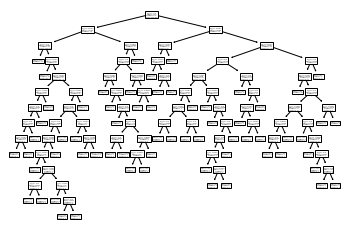

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier=classifier.fit(x_data,y_data)
tree.plot_tree(classifier)

from sklearn.model_selection import cross_val_score
scores=cross_val_score(classifier,x_train,y_train,cv=kf)
print(scores)
print(np.mean(scores)*100)

In [12]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(classifier,x_test,y_test,cv=kf)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1], dtype=int64)